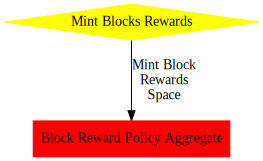

In [1]:
import os
import sys
sys.path.append("..")

from MSML.src import (load_from_json, create_action_chains_graph, write_out_boundary_actions,
                      write_out_policies, write_out_mechanisms, load_svg_graphviz,
                      write_basic_report_full, write_action_chain_reports, write_spec_tree,
                      create_parameter_impact_table)
from IPython.display import display, display_html
from copy import deepcopy
from src import math_spec_json
ms = load_from_json(deepcopy(math_spec_json))

for behavior in ["Mint Block Rewards"]:
    display(create_action_chains_graph(ms, [behavior], behavior))



## Spec Tree

In [2]:
print(write_spec_tree(ms))

├──Entities
│   ├──Servicer
│   ├──Fisherman
│   ├──Application
│   ├──Validator
│   ├──Portal
│   ├──Treasury
│   ├──Relay Chain
│   ├──Global
├──State
│   ├──Global
│   │   ├──Relay Chains
│   │   ├──Sessions
│   ├──Servicer
│   │   ├──Public key
│   │   ├──Servicer Salary
│   │   ├──Report Card
│   │   ├──Test Scores
│   │   ├──POKT Holdings
│   │   ├──Staked POKT
│   │   ├──Service URL
│   │   ├──Relay Chains
│   │   ├──GeoZone
│   │   ├──Operator Public Key
│   │   ├──Pause Height
│   ├──Fisherman
│   ├──Application
│   │   ├──Public key
│   │   ├──POKT Holdings
│   │   ├──Staked POKT
│   │   ├──Relay Chains
│   │   ├──GeoZone
│   │   ├──Number of Servicers
│   ├──Validator
│   │   ├──Public key
│   │   ├──POKT Holdings
│   │   ├──Staked POKT
│   │   ├──Service URL
│   │   ├──Operator Public Key
│   ├──Portal
│   ├──Treasury
│   │   ├──Floating Supply
│   ├──Relay Chain
│   │   ├──Name
│   │   ├──Portal API Prefix
│   │   ├──Relay Chain ID
├──Spaces
│   ├──Servicer Stake Space
│  

## Parameter Impacts

- Parameter links shows just direct impact, parameter links exploded shows indirect upstream and downstream impacts.

- Blocks orientation shows what parameters are associated with blocks, parameters orientation shows the impacts of parameters on blocks. Information is the same though, just a different view.

In [3]:
print("Parameter Links, Parameters View")
print(create_parameter_impact_table(ms.param_links, orientation="Parameters"))
print()
print()
print("-"*50)
print()
print()
print("Parameter Links Exploded, Parameters View")
print(create_parameter_impact_table(ms.param_links_exploded, orientation="Parameters"))
print()
print()
print("-"*50)
print()
print()
print("Parameter Links, Blocks View")
print(create_parameter_impact_table(ms.param_links, orientation="Blocks"))
print()
print()
print("-"*50)
print()
print()
print("Parameter Links Exploded, Blocks View")
print(create_parameter_impact_table(ms.param_links_exploded, orientation="Blocks"))

Parameter Links, Parameters View
                                            Boundary Actions  \
minimum_stake_servicer                                    []   
minimum_stake_period_servicer                             []   
minimum_pause_time                                        []   
max_chains_servicer                                       []   
salary_block_frequency                                    []   
usage_to_reward_coeffecient                               []   
minimum_test_score_threshold                              []   
minimum_report_card_threshold                             []   
servicer_unbounding_period                                []   
servicer_stake_floor_multiplier                           []   
servicer_stake_weight_ceiling                             []   
servicer_stake_floor_multiplier_exponent                  []   
servicer_stake_weight_multiplier                          []   
relays_to_tokens_multiplier                               []   
minimum

In [4]:
write_action_chain_reports(ms, "reports/actions", ["Servicer Stake", "Application Stake", "Servicer Pause",
                                                  "Validator Stake", "Servicer Block Reward"])
write_basic_report_full(ms, "reports", "Basic Report")